In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/User/Dropbox/Desktop/Wholesale customers data.csv")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Missing Value Detection

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No Missing values

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

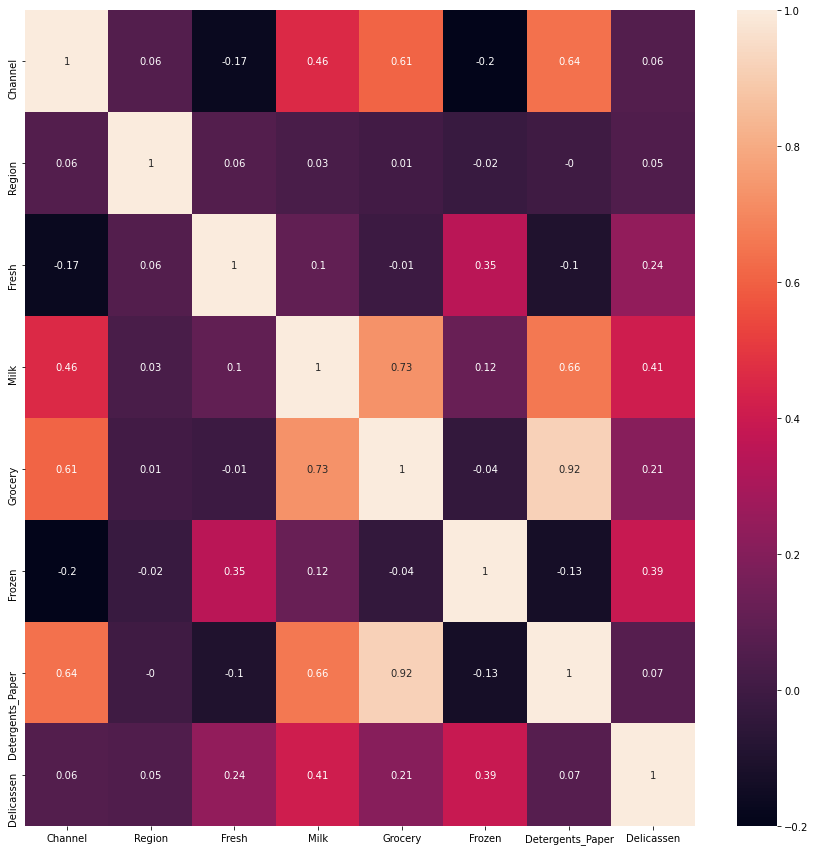

In [7]:
corrmatrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmatrix,annot=True)

In [9]:
df.shape

(440, 8)

In [10]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# k-means clustering

In [15]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It 

Text(0, 0.5, 'Inertia or SSE')

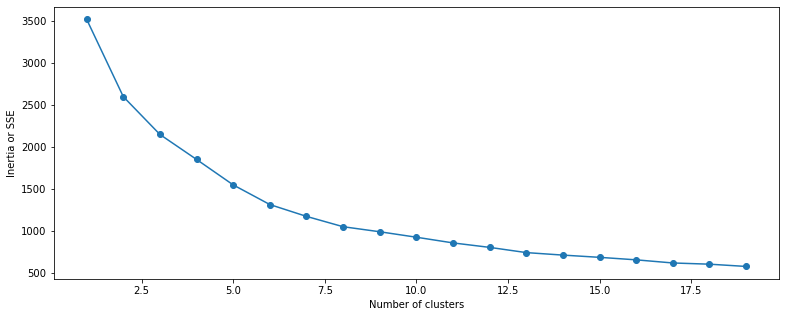

In [16]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

    model.fit(scaled_df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

In [29]:
model = KMeans(n_clusters=6,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model.fit(scaled_df)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=6, n_jobs=-1, precompute_distances='auto', random_state=42)

In [30]:
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(scaled_df)
df['cluster'] = pred
print('\nCount in each cluster: \n', df['cluster'].value_counts())

SSE:  1314.8913838359522

Centroids: 
 [[-6.90297086e-01  5.90668285e-01 -2.16616886e-01 -3.80006924e-01
  -4.76249417e-01 -8.32741037e-02 -4.44672309e-01 -1.79350114e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.77720838e-01  2.84430211e-01  2.24499548e+00 -7.35112400e-02
  -2.04298800e-01  1.28561554e+00 -4.02219973e-01  4.70290526e-01]
 [-5.67368999e-01 -1.57920251e+00 -1.11632825e-01 -3.54548397e-01
  -4.04418651e-01  3.33152868e-02 -4.24041671e-01 -1.52151186e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]]

Count in each cluster: 
 0    179
1    125
4     87
3     38
5     10
2      1
Name: cluster, dtype: int64


# optimum number of clusters is 6 in k-means clustering method.

# hierarchical clustering

In [20]:
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [21]:
eu_d = pdist(scaled_df,metric='euclidean')
clus = linkage(eu_d,method='average')
names = np.arange(0,scaled_df.shape[0]).tolist()

Text(0.5, 1.0, 'cluster dendogram')

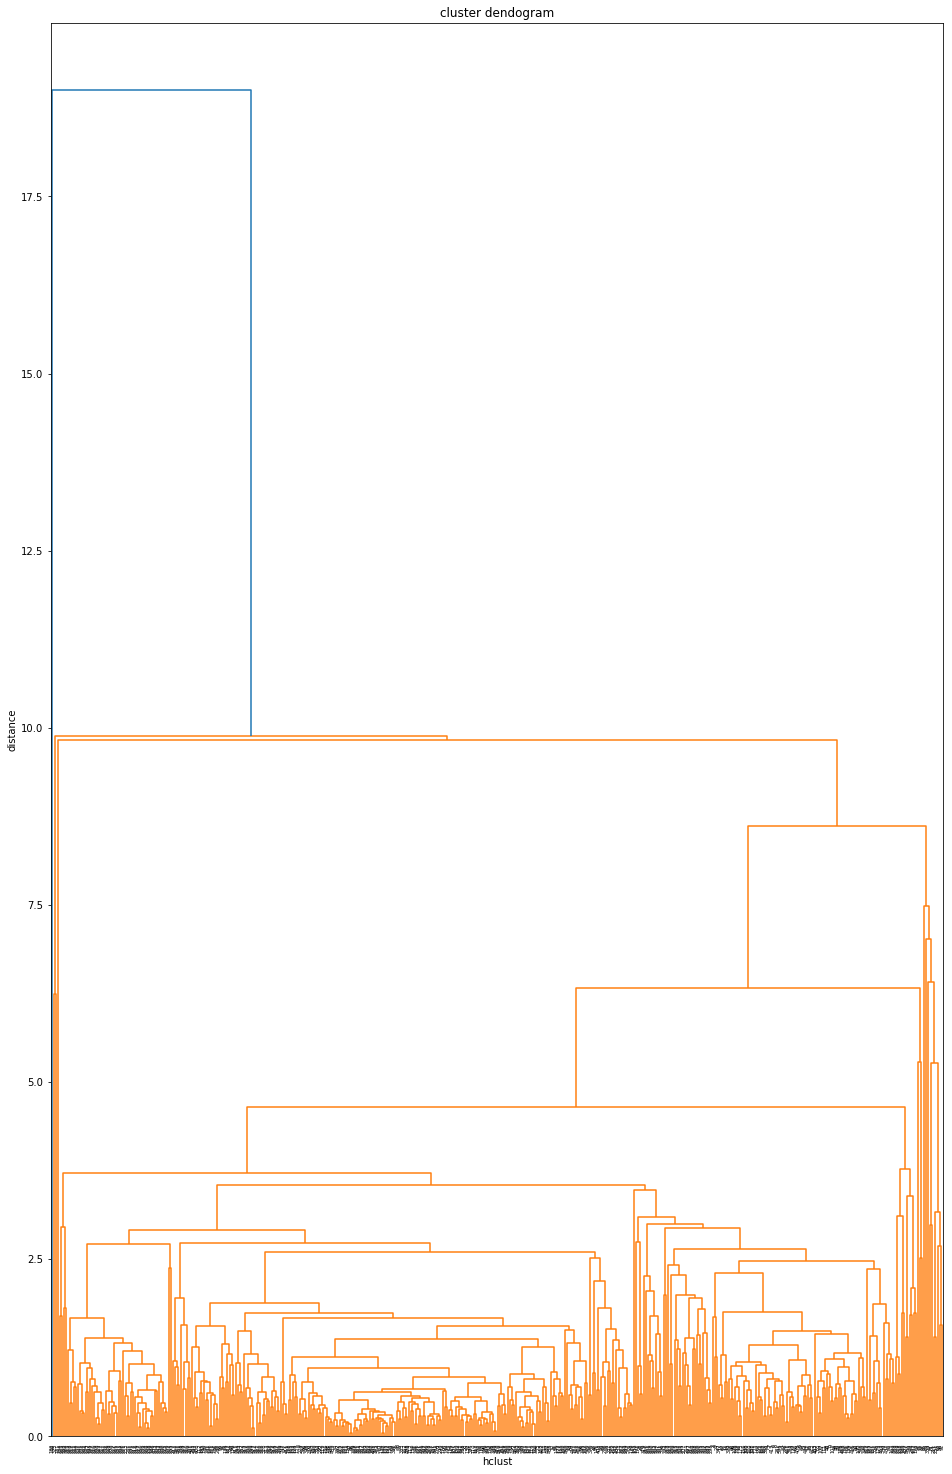

In [25]:
plt.figure(figsize=[16,26])
dendrogram(clus,labels=names)
plt.xlabel('hclust')
plt.ylabel('distance')
plt.title('cluster dendogram')

In [26]:
data_hier = df.copy()
data_hier.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [27]:
data_hier['clusters'] = cut_tree(clus,4)

In [28]:
clust_profile = data_hier.groupby(['clusters'],as_index=False).mean()
clust_profile

,clusters,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0,1.325688,2.541284,11667.665138,5635.105505,7900.357798,2758.011468,2892.951835,1390.236239,0.965596
1,1,1.000000,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,2.500000
2,2,1.000000,3.000000,112151.000000,29627.000000,18148.000000,16745.000000,4948.000000,8550.000000,1.000000
3,3,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,4.000000


# optimum number of clustering is 4

# PCA for dimensionality reduction

In [31]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pc = pca2.fit_transform(scaled_df)
pc_df = pd.DataFrame(pc)
pc_df.head()

,0,1
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199


In [37]:
pca = pd.concat([pc_df,df['cluster']],axis=1)
pca.columns = ['pc1','pc2','clusters']
print(pca.shape)
pca.head()

(440, 3)


,pc1,pc2,clusters
0,0.843939,-0.515351,1
1,1.062676,-0.484601,1
2,1.269141,0.682055,1
3,-1.056782,0.610821,0
4,0.634030,0.974199,1


In [38]:
pca.clusters.value_counts()

0    179
1    125
4     87
3     38
5     10
2      1
Name: clusters, dtype: int64

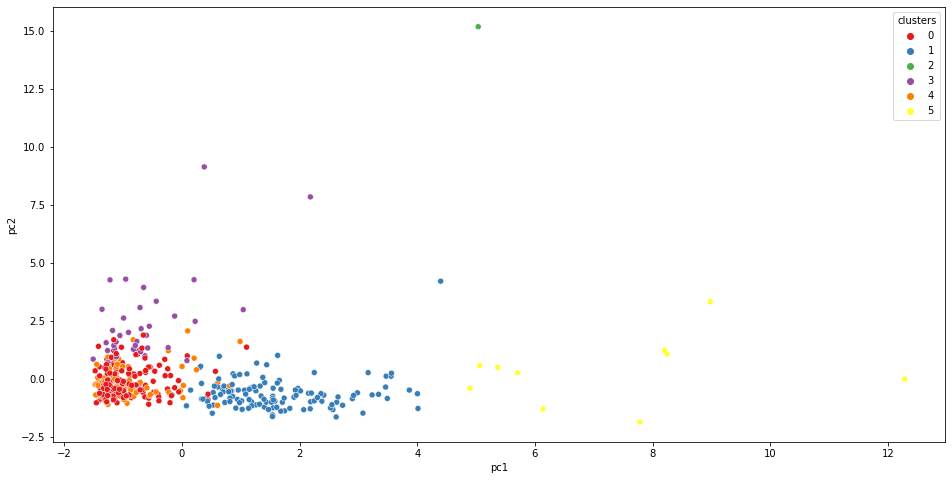

In [39]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='pc1', y='pc2', hue= 'clusters', data=pca,palette='Set1')
plt.show()